In [47]:
import pandas as pd
import numpy as np
import seaborn as sbn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings

warnings.filterwarnings('ignore')

In [2]:
bs=pd.read_csv('Bias_correction_ucl.csv')

In [3]:
bs.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
bs.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [5]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
station             7750 non-null float64
Date                7750 non-null object
Present_Tmax        7682 non-null float64
Present_Tmin        7682 non-null float64
LDAPS_RHmin         7677 non-null float64
LDAPS_RHmax         7677 non-null float64
LDAPS_Tmax_lapse    7677 non-null float64
LDAPS_Tmin_lapse    7677 non-null float64
LDAPS_WS            7677 non-null float64
LDAPS_LH            7677 non-null float64
LDAPS_CC1           7677 non-null float64
LDAPS_CC2           7677 non-null float64
LDAPS_CC3           7677 non-null float64
LDAPS_CC4           7677 non-null float64
LDAPS_PPT1          7677 non-null float64
LDAPS_PPT2          7677 non-null float64
LDAPS_PPT3          7677 non-null float64
LDAPS_PPT4          7677 non-null float64
lat                 7752 non-null float64
lon                 7752 non-null float64
DEM                 7752 non-null float64
Slope       

In [6]:
bs.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
bs['station'].value_counts()

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

In [11]:
bs['Date'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7747    False
7748    False
7749    False
7750     True
7751     True
Name: Date, Length: 7752, dtype: bool

In [12]:
#As the null values are comparitively less,dropping the null values..
bsn=bs.dropna()

In [13]:

bsn.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [14]:
#EDA..
#Univariate analysis

num_cols=[col for col in bsn if bsn[col].dtype!='O']
num_cols

['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

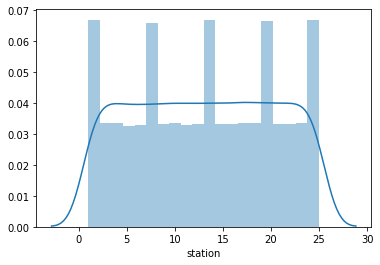

In [16]:
sbn.distplot(bsn['station'])

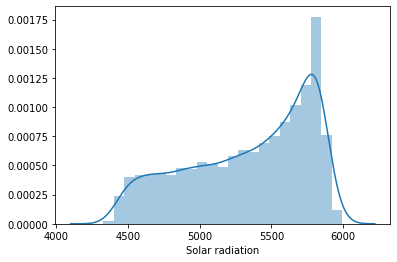

In [17]:
sbn.distplot(bsn['Solar radiation'])

the above plot shows radiation is right skewed

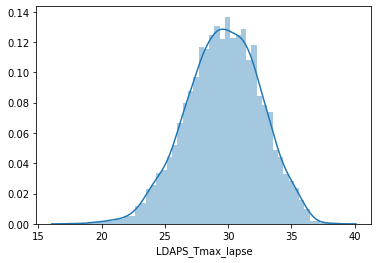

In [18]:
sbn.distplot(bsn['LDAPS_Tmax_lapse'])

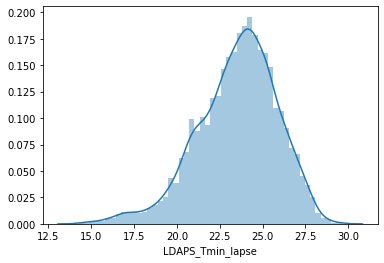

In [19]:
sbn.distplot(bsn['LDAPS_Tmin_lapse'])

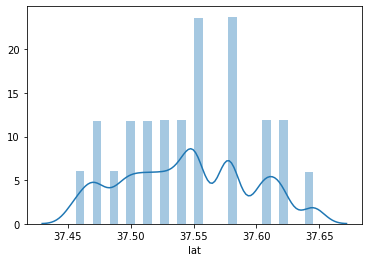

In [32]:
sbn.distplot(bsn['lat'])

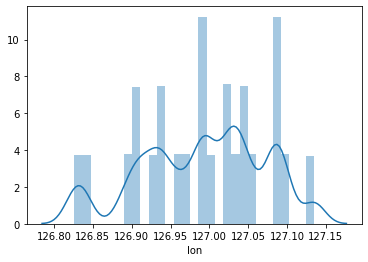

In [33]:
sbn.distplot(bsn['lon'])


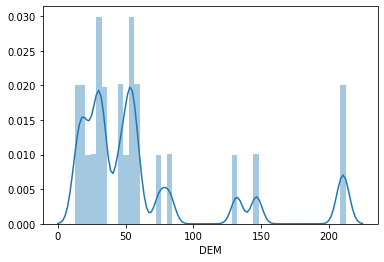

In [34]:
 sbn.distplot(bsn['DEM'])
                

All the columns are normally distributed 

In [35]:
bsn['Date'].unique()

array(['2013-06-30', '2013-07-01', '2013-07-02', '2013-07-03',
       '2013-07-04', '2013-07-05', '2013-07-06', '2013-07-07',
       '2013-07-08', '2013-07-09', '2013-07-10', '2013-07-11',
       '2013-07-12', '2013-07-13', '2013-07-14', '2013-07-15',
       '2013-07-16', '2013-07-17', '2013-07-18', '2013-07-19',
       '2013-07-20', '2013-07-21', '2013-07-22', '2013-07-23',
       '2013-07-24', '2013-07-25', '2013-07-26', '2013-07-27',
       '2013-07-28', '2013-07-29', '2013-07-30', '2013-07-31',
       '2013-08-01', '2013-08-02', '2013-08-03', '2013-08-04',
       '2013-08-05', '2013-08-06', '2013-08-07', '2013-08-08',
       '2013-08-09', '2013-08-11', '2013-08-12', '2013-08-13',
       '2013-08-14', '2013-08-15', '2013-08-16', '2013-08-17',
       '2013-08-18', '2013-08-19', '2013-08-20', '2013-08-21',
       '2013-08-22', '2013-08-23', '2013-08-24', '2013-08-25',
       '2013-08-26', '2013-08-27', '2013-08-28', '2013-08-29',
       '2013-08-30', '2014-06-30', '2014-07-01', '2014-

In [40]:
bsn['Month']=pd.to_datetime(bsn['Date']).dt.month
bsn['Day']=pd.to_datetime(bsn['Date']).dt.day
bsn['Year']=pd.to_datetime(bsn['Date']).dt.year


In [41]:
bnew=bsn.drop('Date',axis=1)

In [42]:
#Seperating the target and features

x=bnew.drop(['Next_Tmax','Next_Tmin'],axis=1)

In [43]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Month,Day,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,6,30,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,6,30,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,6,30,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,6,30,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,6,30,2013


In [44]:
#Bringing down alll the features to commonscale

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scx=sc.fit_transform(x)
scx=pd.DataFrame(scx,columns=x.columns)

In [54]:
Y=pd.DataFrame(bnew,columns=['Next_Tmax','Next_Tmin'])

In [55]:
#train test
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=.22,random_state=45)

In [56]:
#Implementing the linear models 


lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [57]:
predy=lr.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,predy))
print('Mean Squared Error:',mean_squared_error(y_test,predy))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predy)))
print('R2 sCcore is:',r2_score(y_test,predy))

Mean Absolute Error: 0.9345054575664806
Mean Squared Error: 1.5804739984142273
Root Mean Squared Error: 1.2571690413044012
R2 sCcore is: 0.806229494114303


In [58]:
#Cross validation

cvs=cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(cvs)
print(cvs.mean())
print(cvs.std())

[0.80939189 0.81996697 0.8179574  0.81204756 0.79231911]
0.8103365856064301
0.009790509265913143


In [59]:
#Selecting the random state

def max_r2_score(model,x,y):
    f_r2_score=0
    for rst in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=rst)
        model.fit(x_train,y_train)
        predm=model.predict(x_test)
        r2s=r2_score(y_test,predm)
        print('r2 score is',r2s,'for the random state',rst)
    
        if r2s>f_r2_score:
            f_r2_score=r2s
    print('max r2 score for the corresponding random state is ',f_r2_score,rst)
    return rst

In [61]:
max_r2_score(lr,x,Y)

r2 score is 0.81124601514909 for the random state 42
r2 score is 0.8244060039081965 for the random state 43
r2 score is 0.7940202910656662 for the random state 44
r2 score is 0.806229494114303 for the random state 45
r2 score is 0.807479501754454 for the random state 46
r2 score is 0.8093909571612217 for the random state 47
r2 score is 0.8190391628718388 for the random state 48
r2 score is 0.8031663580446524 for the random state 49
r2 score is 0.8113180107588169 for the random state 50
r2 score is 0.8143675631592713 for the random state 51
r2 score is 0.8090542475502689 for the random state 52
r2 score is 0.8080820466623921 for the random state 53
r2 score is 0.8151038385024227 for the random state 54
r2 score is 0.8140560074126733 for the random state 55
r2 score is 0.8149201603284624 for the random state 56
r2 score is 0.8035346266271286 for the random state 57
r2 score is 0.8112632467753668 for the random state 58
r2 score is 0.8045529347172578 for the random state 59
r2 score is 0.

99

In [62]:
dtr=DecisionTreeRegressor(criterion='mse')

params={'criterion': ['mse'],
 'max_depth': [None],
 'max_features': [None],
 'max_leaf_nodes': [4,8,16],
 'min_impurity_decrease': [0.0],
 'min_impurity_split': [None],
 'min_samples_leaf': [1,2,4],
 'min_samples_split': [2,4],
 'min_weight_fraction_leaf': [0.0],
 'presort': [False],
 'random_state': [None],
 'splitter': ['best']}


In [63]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(estimator=dtr,param_grid=params)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 16,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [64]:
#Decision Tree Regressor

dtr=DecisionTreeRegressor(criterion='mse',
 max_leaf_nodes=16,
 min_impurity_decrease=0.0,
 min_samples_leaf= 4,
 min_samples_split=2,
 splitter='best')
dtr.fit(x_train,y_train)
dtrpr=dtr.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,dtrpr))
print('Mean Squared Error:',mean_squared_error(y_test,dtrpr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,dtrpr)))
print('R2 sCcore is:',r2_score(y_test,dtrpr))

Mean Absolute Error: 1.2034092949151205
Mean Squared Error: 2.4137314861841848
Root Mean Squared Error: 1.5536188355527185
R2 sCcore is: 0.6981406719329792


In [68]:
#Lets check with KNN regressor

from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train,y_train)
knrp=knr.predict(x_test)
print('mean r2 score for kNeighbor regressor is',cross_val_score(knr,x_train,y_train,cv=5,scoring='r2').mean())


mean r2 score for kNeighbor regressor is 0.4873013569292617


In [69]:
#Lets use RandomForest

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rfp=rf.predict(x_test)
print('mean r2 score for kNeighbor regressor is',cross_val_score(rf,x_train,y_train,cv=5,scoring='r2').mean())

mean r2 score for kNeighbor regressor is 0.8828459121918376


In [70]:
#Fitting the best model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rfp=rf.predict(x_test)
print('Mean Absolute Error:',mean_absolute_error(y_test,rfp))
print('Mean Squared Error:',mean_squared_error(y_test,rfp))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,rfp)))
print('Mean R2 sCcore is:',r2_score(y_test,rfp).mean())


Mean Absolute Error: 0.7103892215568859
Mean Squared Error: 0.8973005389221562
Root Mean Squared Error: 0.9472594886947062
Mean R2 sCcore is: 0.8855255435431846


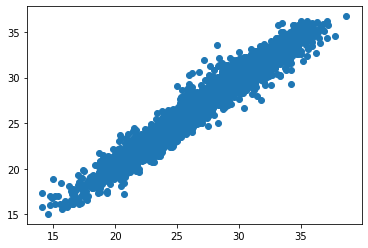

In [71]:
#plotting actual vs predicted

plt.scatter(y_test,rfp)
plt.show()

In [72]:
y_test.shape

(1670, 2)

In [73]:
y_test.head()

,Next_Tmax,Next_Tmin
7748,28.6,18.8
6951,25.9,23.4
7135,34.5,26.8
1488,27.0,23.9
6298,32.0,23.9


In [75]:
#Saving the predicted values to csv

rfp=pd.DataFrame(rfp,columns=['next_tmax','next_tmin'])

In [76]:
rfp.head()

,next_tmax,next_tmin
0,27.44,17.48
1,28.54,23.45
2,35.73,26.54
3,27.35,23.68
4,31.57,23.01


In [77]:
#Saving to csv
rfp.to_csv('next_temp_prediction.csv',index=False)

In [78]:
#Saving model

import joblib

joblib.dump(rf,'next_temp_predictions.pkl')

['next_temp_predictions.pkl']